# Group Assignment 1 - Tidy datasets
Completed by: Riccardo Carollo, Giulia Amenduni, Elia Parolari 

## The dataset 
The dataset used in this challenge originates from the NYC Taxi and Limousine Commission. It contains records of yellow taxi rides taken in New York City during May 2015. Each entry in the dataset represents a single taxi trip paid for by credit card. The data includes a range of features related to the ride details that will be explored in this notebook. 

## Objectives 
The main goal of this notebook is to understand and visualise the data with the goal of indentifying problematic aspects. Additionalty the data will be re-formatted in a more suitable manner. 

## Importing libraries and dataset

In [75]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import calendar
import folium
from folium.plugins import MarkerCluster
from IPython.display import Image


In [76]:
file_path = '/Users/ric_carollo/Works/Data_Science_Project/taxi_tidy.csv' 
taxi_df = pd.read_csv(file_path)

## Getting acquainted with the data
After a first sight of the dataset, here are some initial thoughts: 
- We can immediately drop the Unnamed: 0 column since it seems to be just acting as an index
- We can format the data columns more effectively 
- We can study the drop/pickup locations of the rides 
- We can study the length, duration and cost of the rides

First notice that all entries are defined, i.e. there are no NaN values. There are more or less hald a million entries, maily of int and float types, expect from pickup_NTACode, dropoff_NTACode and pair.\
Let's also define some useful functions, which will be exploited during the analysis.

In [77]:
taxi_df.head()

,Unnamed: 0,pickup_hour,pickup_month,pickup_week,pickup_doy,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
0,1,18,5,19,132,4,520,1,MN15,1,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19
1,2,7,5,21,146,4,672,1,MN24,1,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,MN24-MN17
2,3,18,5,19,127,6,824,1,MN21,1,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24
3,4,2,5,22,148,6,637,1,MN17,1,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,MN17-MN33
4,5,17,5,21,141,6,2491,1,MN17,4,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,MN17-QN98


In [78]:
taxi_df_1 = taxi_df.drop('Unnamed: 0', axis = 1)

In [79]:
taxi_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491292 entries, 0 to 491291
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_hour        491292 non-null  int64  
 1   pickup_month       491292 non-null  int64  
 2   pickup_week        491292 non-null  int64  
 3   pickup_doy         491292 non-null  int64  
 4   pickup_wday        491292 non-null  int64  
 5   length_time        491292 non-null  int64  
 6   pickup_BoroCode    491292 non-null  int64  
 7   pickup_NTACode     491292 non-null  object 
 8   dropoff_BoroCode   491292 non-null  int64  
 9   dropoff_NTACode    491292 non-null  object 
 10  pickup_longitude   491292 non-null  float64
 11  pickup_latitude    491292 non-null  float64
 12  dropoff_longitude  491292 non-null  float64
 13  dropoff_latitude   491292 non-null  float64
 14  vendor_id          491292 non-null  int64  
 15  passenger_count    491292 non-null  int64  
 16  tr

## Defining visualisation functions 
Defining these functions will simplify the analysis and reduce duplicated code as much as possible 

In [80]:
def plot_histogram(dataframe, column_name, bin_count=None):
    plt.figure(figsize=(8, 6))
    column_data = dataframe[column_name].dropna()
    plt.hist(column_data, bins=bin_count, color='skyblue', edgecolor='black')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name}')
    plt.grid(False)
    plt.show()

def plot_boxplot(dataframe, column_name):
    plt.figure(figsize=(8, 6))
    column_data = dataframe[column_name].dropna()
    plt.boxplot(column_data, vert=False)
    plt.xlabel(column_name)
    plt.title(f'Boxplot of {column_name}')
    plt.grid(False)
    plt.show()

def plot_pie_chart(dataframe, column_name):
    value_counts = dataframe[column_name].value_counts()
    
    labels = value_counts.index.tolist()
    counts = value_counts.values.tolist()
    
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.title(f'Pie Chart of {column_name}')
    plt.grid(False)
    plt.show()

def plot_pie_chart_2(series):
    labels = series.index.tolist()
    counts = series.values.tolist()
    
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.title(f'Pie Chart of {series.name}')
    plt.grid(False)
    plt.show()

def plot_bar_chart(dataframe, column_name):
    value_counts = dataframe[column_name].value_counts()
    
    plt.figure(figsize=(10, 6))
    plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Bar Chart of {column_name}')
    plt.xticks(rotation=45)  
    plt.grid(False)
    plt.show()

def plot_correlation_heatmap(df, columns=None, title='Correlations'):
    if columns is not None:
        df = df[columns]
    df_corr = df.corr()
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    sns.heatmap(df_corr, mask=np.triu(df_corr), fmt=".2f", linewidths=0.5, cmap=cmap, vmin= 0, vmax = 1)
    plt.title(title, fontsize=16, pad=20)
    plt.tight_layout()
    plt.grid(False)
    plt.show()


def plot_scatter_with_color(df, x_variable, y_variable, color_variable=None):
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(10, 6))
    
    if color_variable is not None:
        sns.scatterplot(data=df, x=x_variable, y=y_variable, hue=color_variable, palette="viridis", edgecolor="w", s=100)
        plt.legend(title=color_variable)
    else:
        sns.scatterplot(data=df, x=x_variable, y=y_variable, edgecolor="w", s=100)
    
    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.grid(False)
    plt.title(f"2D Scatter Plot ({x_variable} vs {y_variable}" + (f" with color representing {color_variable}" if color_variable else "") + ")")
    
    plt.show()

## Visualisation and Summary Statistcs Section

### Distribution of Taxi Pick-Up Times Across Different Temporal Intervals
In the histograms plotted above, it can be seen that there is no data outside the expected range: for pickup_hour, all information stored belong to the interval 0-23, for pickup_week within the 18th-22nd week of the year, for pickup_doy within the 122nd-152nd day of the year and for pick_wday within the seven days of the week.

Here are few considerations:
- Lowest activity between [01:00,07:00]
- Highest activity between [19:00, 22:00]
- There are no notacible differences, during the week there is a less heavy concentration in the night hours compared to the weekend.



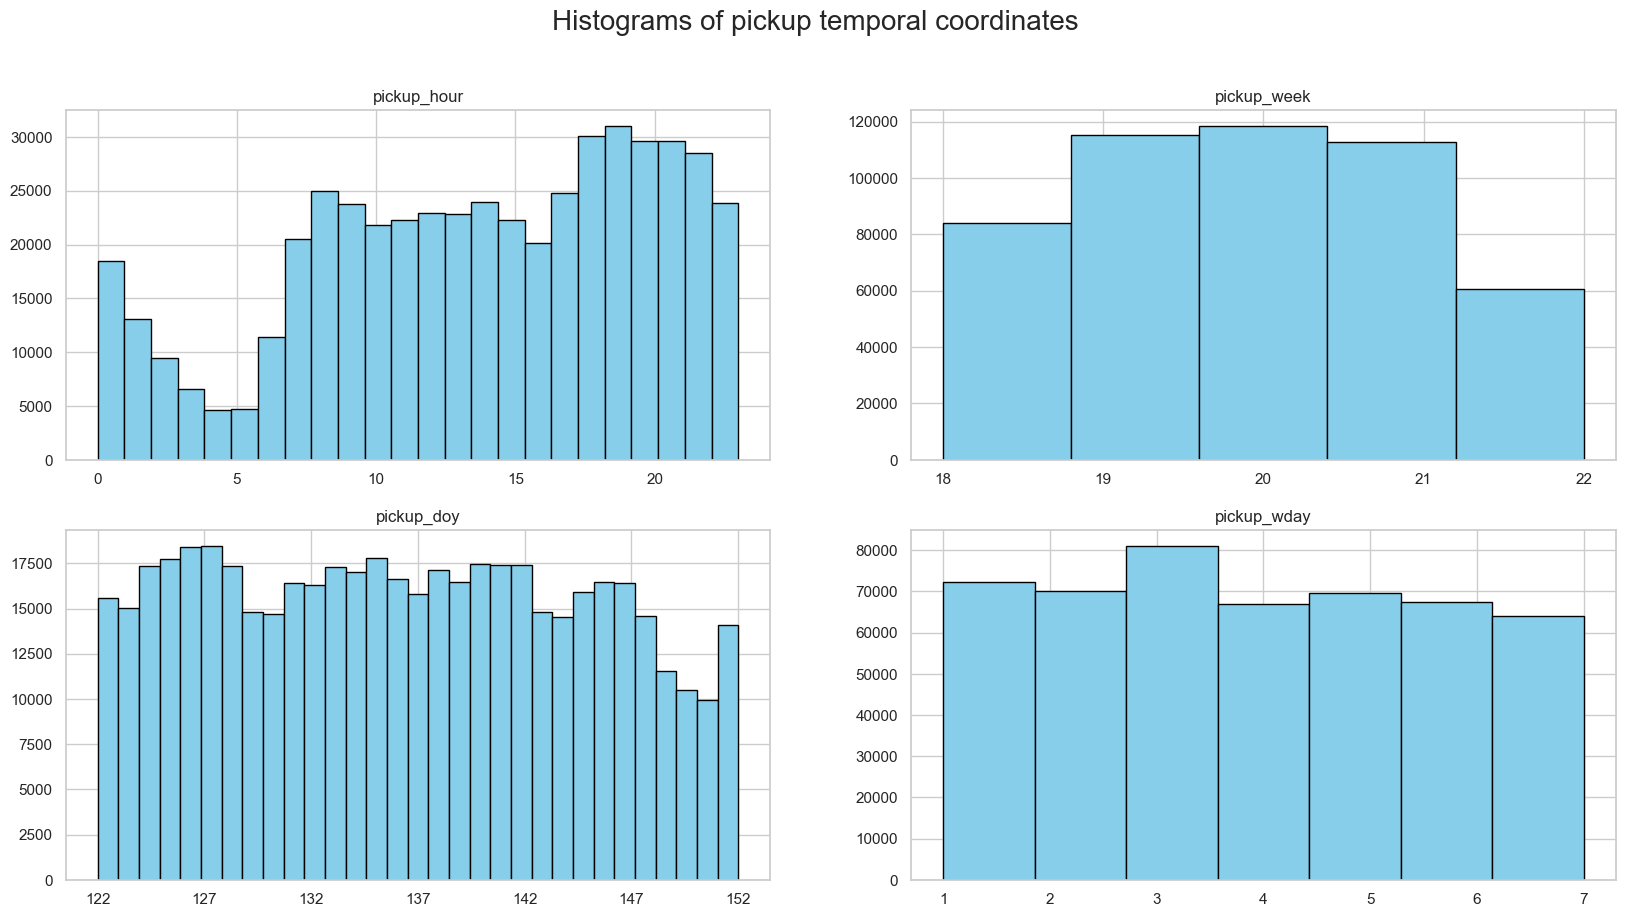

In [85]:
nrows,ncols= 2,2
fig, axs = plt.subplots(nrows,ncols, figsize = (20,10))
ax = axs.ravel()
relevant_cols = ['pickup_hour', 'pickup_week', 'pickup_doy', 'pickup_wday']
for i in range(len(relevant_cols)):
    ticks = sorted(taxi_df_1[relevant_cols[i]].unique())
    bins = len(taxi_df_1[relevant_cols[i]].unique()) 
    ax[i].hist(taxi_df_1[relevant_cols[i]], bins = bins, color='skyblue', edgecolor='black')
    if bins >= 20:
        ax[i].set_xticks(ticks[0:len(ticks):5])
    else:
        ax[i].set_xticks(taxi_df_1[relevant_cols[i]].unique())
    ax[i].set_title(f'{relevant_cols[i]}')
plt.suptitle('Histograms of pickup temporal coordinates', fontsize = 20);
       

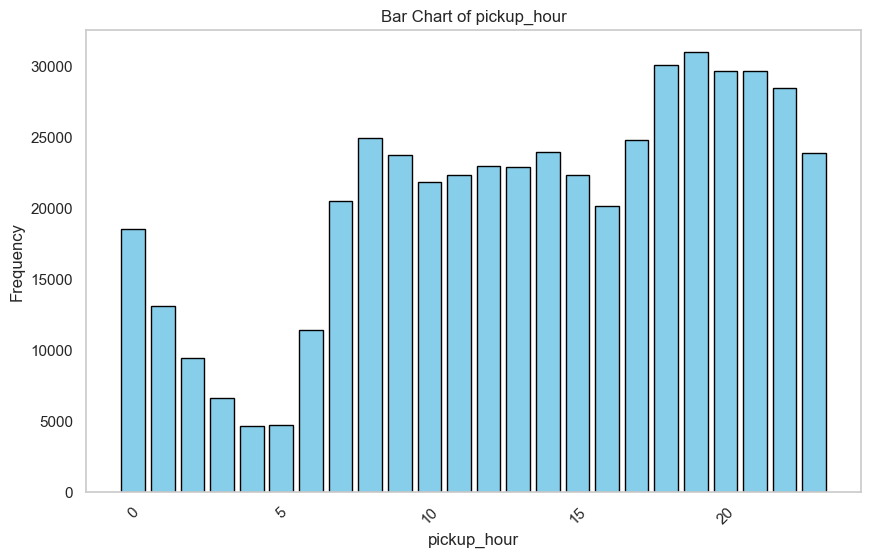

In [86]:
plot_bar_chart(taxi_df_1, 'pickup_hour')

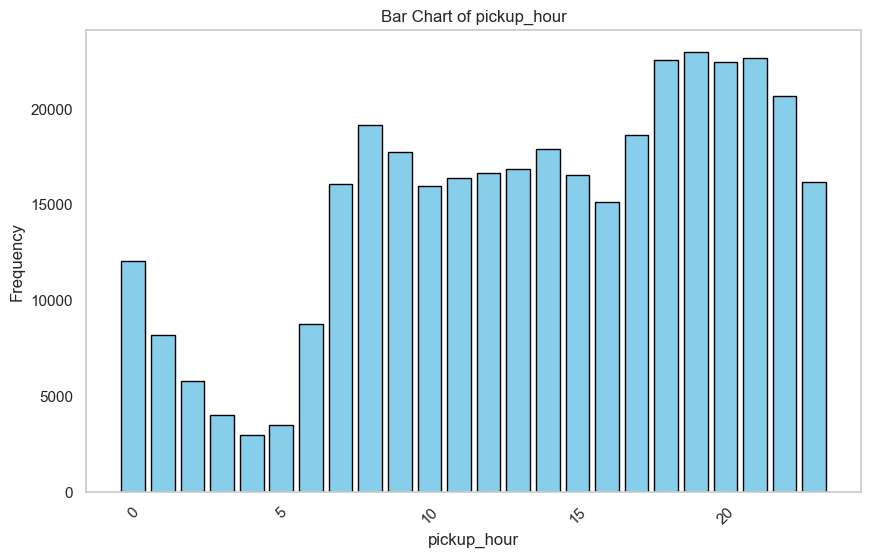

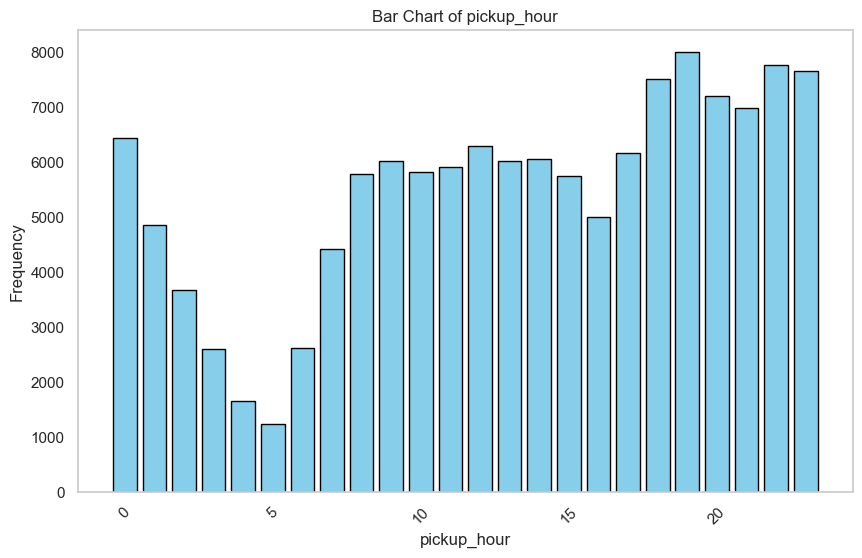

In [87]:
plot_bar_chart(taxi_df_1[taxi_df_1['pickup_wday'].isin([1, 2, 3, 4, 5])], 'pickup_hour')
plot_bar_chart(taxi_df_1[taxi_df_1['pickup_wday'].isin([6,7])], 'pickup_hour')

### Normalised Distribution of Taxi Pick-Ups by Week and Day of the Week

- Let's proceed with the analysis of the weeks of pick-up: in general, there are 4 weeks in a given month so we may have to consider that the first and last week contain less days. 
- We obtain a relatively uniform distribution: however, mondays and tuesdays tend to have less traffic

In [88]:
df_days_check = taxi_df_1.groupby('pickup_week')['pickup_wday'].nunique()
df_days_check

pickup_week
18    5
19    7
20    7
21    7
22    5
Name: pickup_wday, dtype: int64

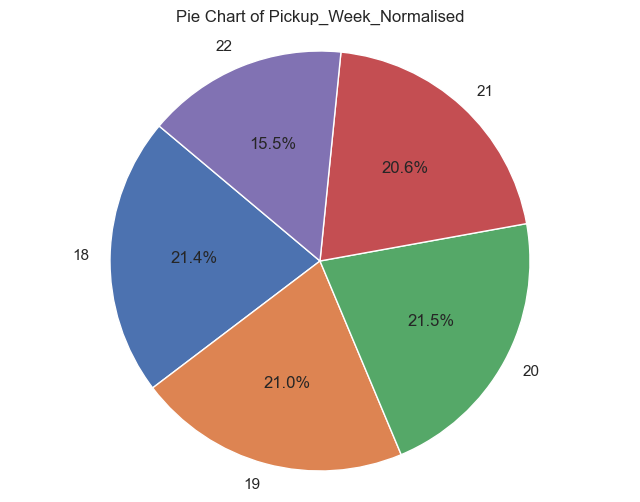

In [89]:
column_name = 'pickup_week'
pickup_week_normalised = pd.Series(np.divide(taxi_df_1[column_name].value_counts(), df_days_check), name = 'Pickup_Week_Normalised')
plot_pie_chart_2(pickup_week_normalised)

In [90]:
df_days_in_week = taxi_df_1.groupby('pickup_week')['pickup_wday'].unique()
df_days_in_week

pickup_week
18          [4, 3, 1, 5, 2]
19    [4, 6, 7, 2, 1, 5, 3]
20    [6, 1, 7, 5, 4, 2, 3]
21    [4, 6, 3, 5, 7, 1, 2]
22          [6, 1, 3, 7, 2]
Name: pickup_wday, dtype: object

In [91]:
all_days = pd.Series([day for week in df_days_in_week.values for day in week])
day_counts = all_days.value_counts()
day_counts

3    5
1    5
2    5
4    4
5    4
6    4
7    4
Name: count, dtype: int64

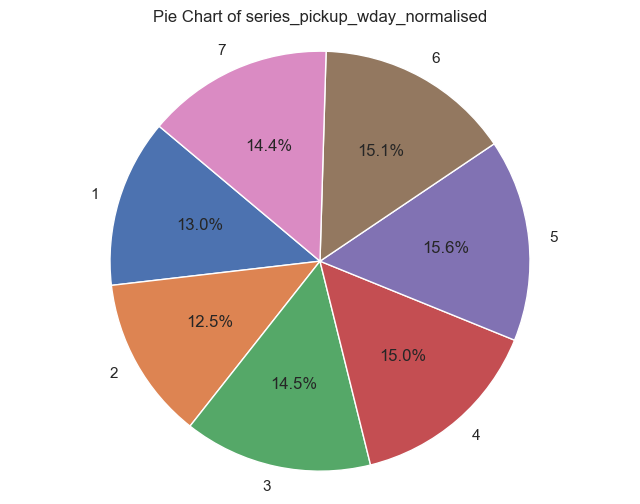

In [92]:
series_pickup_wday_normalised = pd.Series(np.divide(taxi_df_1['pickup_wday'].value_counts(), day_counts), name = 'series_pickup_wday_normalised')
plot_pie_chart_2(series_pickup_wday_normalised)

At the end, obtain a relatively uniform distribution: however, mondays and tuesdays tend to have less traffic

### Summary Statistics of Trip Duration 

On average, a taxi rides seems to last around 16 minutes. However, given such a high maximum value, there might be a set of long rides which may not be in the norm. Nevertheless, 1439 minutes seems excessively high. Let's do a boxplot to see it there are outliers.

In [93]:
taxi_df_1['length_time'].describe()

count    491292.000000
mean        985.000853
std        2694.842046
min           0.000000
25%         434.000000
50%         716.000000
75%        1157.000000
max       86393.000000
Name: length_time, dtype: float64

In [94]:
taxi_df_1['length_time_minutes'] = taxi_df_1['length_time'] / 60
taxi_df_1['length_time_hours'] = taxi_df_1['length_time_minutes'] / 60

In [95]:
taxi_df_1['length_time_minutes'].describe()

count    491292.000000
mean         16.416681
std          44.914034
min           0.000000
25%           7.233333
50%          11.933333
75%          19.283333
max        1439.883333
Name: length_time_minutes, dtype: float64

In [96]:
taxi_df_1['length_time_hours'].describe()

count    491292.000000
mean          0.273611
std           0.748567
min           0.000000
25%           0.120556
50%           0.198889
75%           0.321389
max          23.998056
Name: length_time_hours, dtype: float64

### Boxplot of trip duration 
- There is a considerable amount of rides that are 1.5 * IQR away (where IQR stands for Interquartile range)\.
- There are also rides which last for several hours: perhaps they are not standard rides that occur within the same city.\


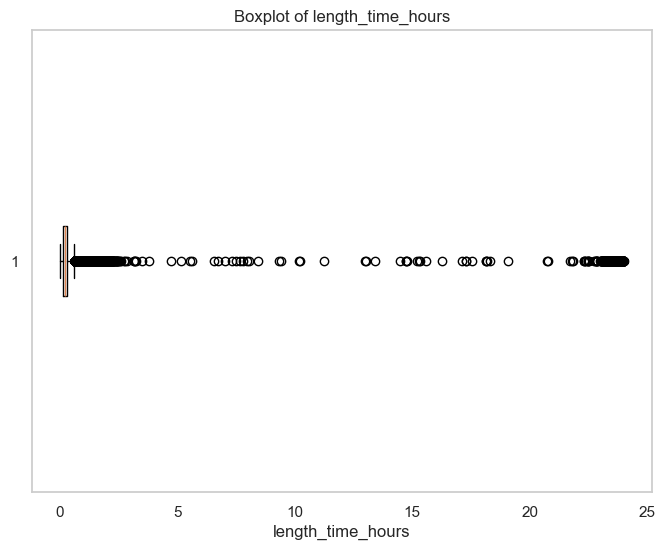

In [97]:
plot_boxplot(taxi_df_1, 'length_time_hours')

### Distribution of non-outlier rides
The vast majority of rides lasts from 5 to 15 minutes


In [98]:
Q1 = taxi_df_1['length_time'].quantile(0.25)
Q3 = taxi_df_1['length_time'].quantile(0.75)
IQR = Q3 - Q1
#only need upper_bound
upper_bound = Q3 + 1.5 * IQR

taxi_df_2 = taxi_df_1[(taxi_df_1['length_time'] <= upper_bound)]

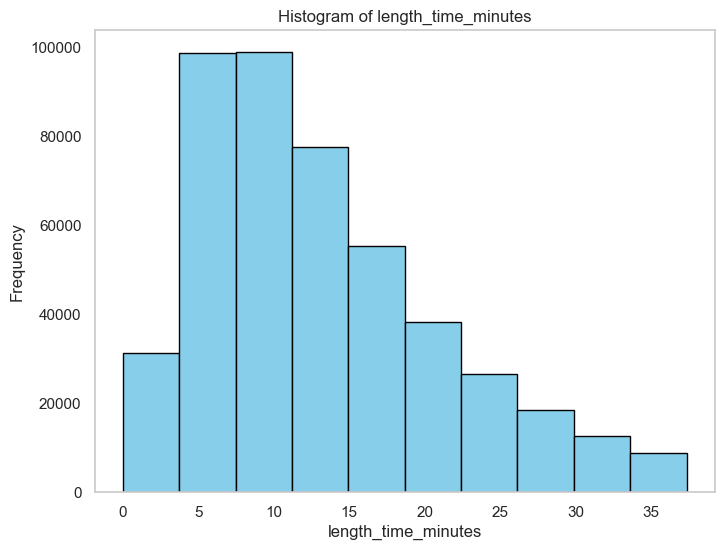

In [99]:
plot_histogram(taxi_df_2, 'length_time_minutes')

In [100]:
taxi_df_2['length_time_minutes'].describe()

count    465942.000000
mean         13.167404
std           7.953133
min           0.000000
25%           7.000000
50%          11.383333
75%          17.745833
max          37.350000
Name: length_time_minutes, dtype: float64

### Studying the summary statistics for passenger counts 
It is evident that the large majority of rides involves one passenger only

In [101]:
taxi_df_1['passenger_count'].describe()

count    491292.000000
mean          1.641301
std           1.293645
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           8.000000
Name: passenger_count, dtype: float64

In [102]:
taxi_df_1['passenger_count'].value_counts()

passenger_count
1    351962
2     70118
5     25926
3     19400
6     15427
4      8440
0        18
8         1
Name: count, dtype: int64

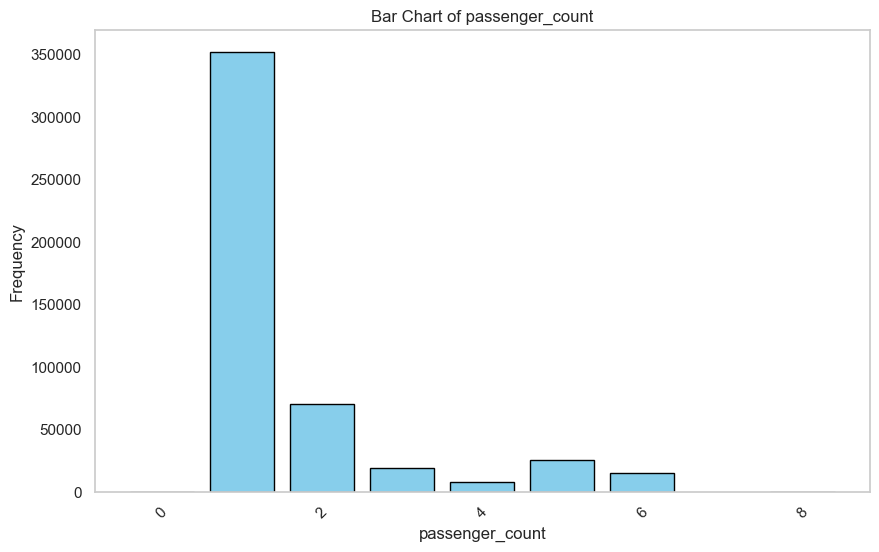

In [103]:
plot_bar_chart(taxi_df_1, 'passenger_count')

### Boxplot for fare amount 
- Similar to before we obseve a significant number of outliers

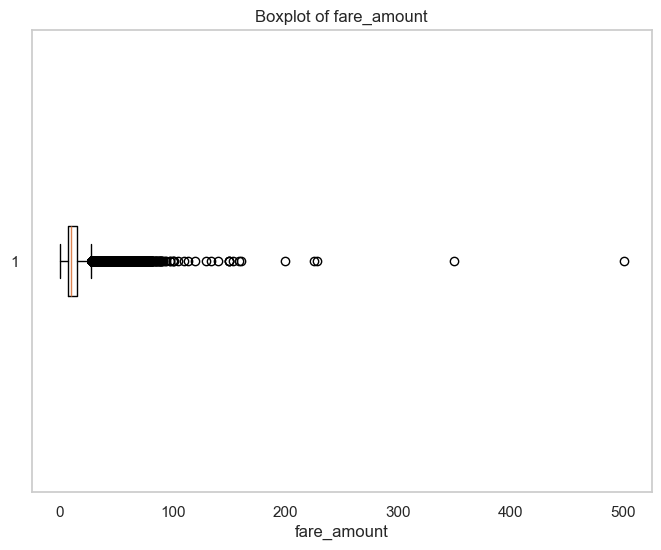

In [104]:
plot_boxplot(taxi_df_1, 'fare_amount')

### Converting trip_distance to km 
- The average trip distance is 45 km(i.e. 28 miles)
- Considering there were trips lasting long time, we should remove them as outliers (from the max we also see that there is a very long journey). Let's repeat the same procedure as above:

In [105]:
taxi_df_1['trip_distance_km'] = taxi_df_1['trip_distance'] * 1.60934
taxi_df_1.drop('trip_distance', inplace = True, axis = 1)
taxi_df_1['trip_distance_km'].describe()

count    4.912920e+05
mean     4.527438e+01
std      2.756010e+04
min      0.000000e+00
25%      1.770274e+00
50%      2.945092e+00
75%      5.471756e+00
max      1.931209e+07
Name: trip_distance_km, dtype: float64

### Boxplot for trip_distance
- Similar to other features there appear to be outliers. Exremely large value appears to be a measurment error. 

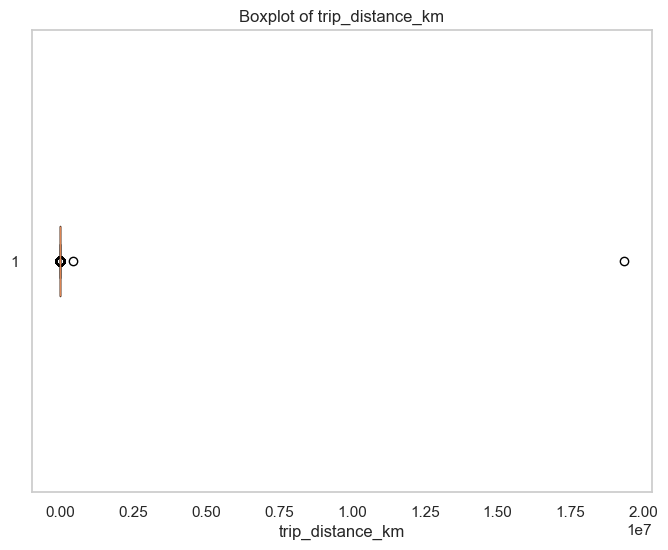

In [106]:
plot_boxplot(taxi_df_1, 'trip_distance_km')

### Distrubition of regular trip distance values 
We notice a 'similar' distrubition to the durations, i.e slight right skew: most of the trips lie in the range [1,3] km 

In [107]:
Q1 = taxi_df_1['trip_distance_km'].quantile(0.25)
Q3 = taxi_df_1['trip_distance_km'].quantile(0.75)
IQR = Q3 - Q1
#only need upper_bound
upper_bound = Q3 + 1.5 * IQR

taxi_df_3 = taxi_df_1[(taxi_df_1['trip_distance_km'] <= upper_bound)]

In [108]:
taxi_df_3['trip_distance_km'].describe()

count    437755.000000
mean          3.305572
std           2.252879
min           0.000000
25%           1.609340
50%           2.639318
75%           4.345218
max          11.023979
Name: trip_distance_km, dtype: float64

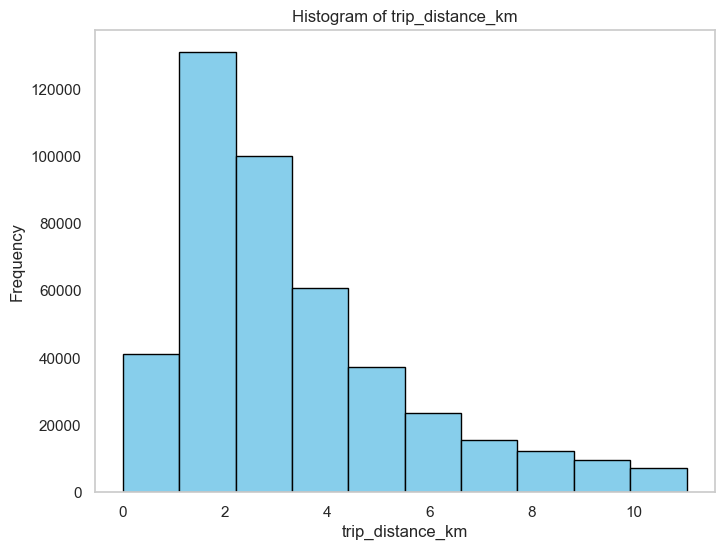

In [109]:
plot_histogram(taxi_df_3, 'trip_distance_km')

### Quantifying the number of outliers 
There seems to be more outliers for the taxi duration rather than distance travelled, probably due to traffic jams

In [110]:
print('Data after having removed outliers from duration:', taxi_df_3.shape[0])
print('Data after having removed outliers from distance travelled:', taxi_df_2.shape[0])

Data after having removed outliers from duration: 437755
Data after having removed outliers from distance travelled: 465942


### Identifying outliers
In this section we aim to verify that in continuous variables there are no irregular values due to measurement errors. The strategy is to work in cases and identify various subgroups of outliers 

In [111]:
def calculate_upperbound(df, feature):
    feature_data = df[feature]
    
    Q1 = feature_data.quantile(0.25)
    Q3 = feature_data.quantile(0.75)
    
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 1.5 * IQR
    
    return upper_bound


In [112]:
upperbound_distance = calculate_upperbound(taxi_df_1, 'trip_distance_km')
upperbound_length_time_minutes = calculate_upperbound(taxi_df_1, 'length_time_minutes')
upper_bound_fare_amount = calculate_upperbound(taxi_df_1, 'fare_amount')

#### Case 1 : Outliers with overly large distance amounts but regular length times
We add a new feature  denoted average_velocity, which, however, will not appear in the final form: it only serves the purpose of detecting outliers.

In [113]:
taxi_df_1['average_velocity'] = np.divide(taxi_df_1['trip_distance_km'], taxi_df_1['length_time_hours'])
taxi_df_outliers = taxi_df_1[taxi_df_1['trip_distance_km'] > upperbound_distance]
taxi_df_outliers = taxi_df_outliers[taxi_df_outliers['length_time_minutes'] <= upperbound_length_time_minutes]

In [114]:
taxi_df_outliers.shape

(33334, 22)

In [115]:
taxi_df_outliers = taxi_df_outliers[np.isfinite(taxi_df_outliers['average_velocity'])]
taxi_df_outliers['average_velocity'].describe()

count    3.332500e+04
mean     1.824339e+03
std      3.176738e+05
min      1.782254e+01
25%      3.030761e+01
50%      3.784679e+01
75%      4.782422e+01
max      5.798458e+07
Name: average_velocity, dtype: float64

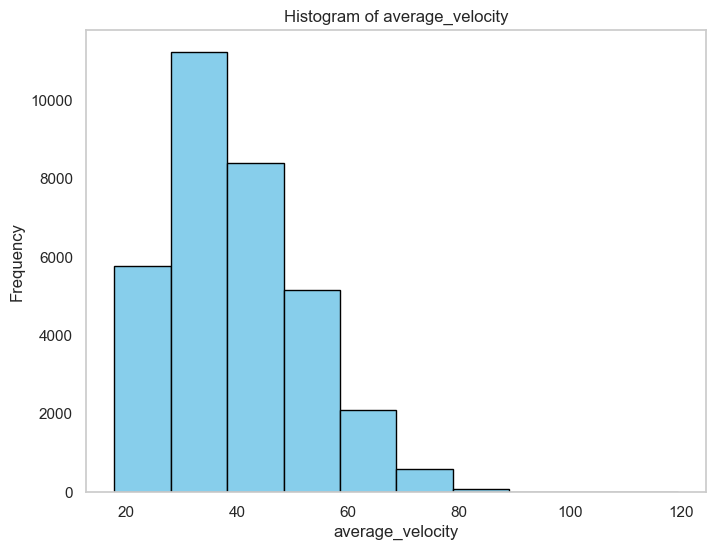

In [116]:
plot_histogram(taxi_df_outliers[taxi_df_outliers['average_velocity'] < 120], 'average_velocity')

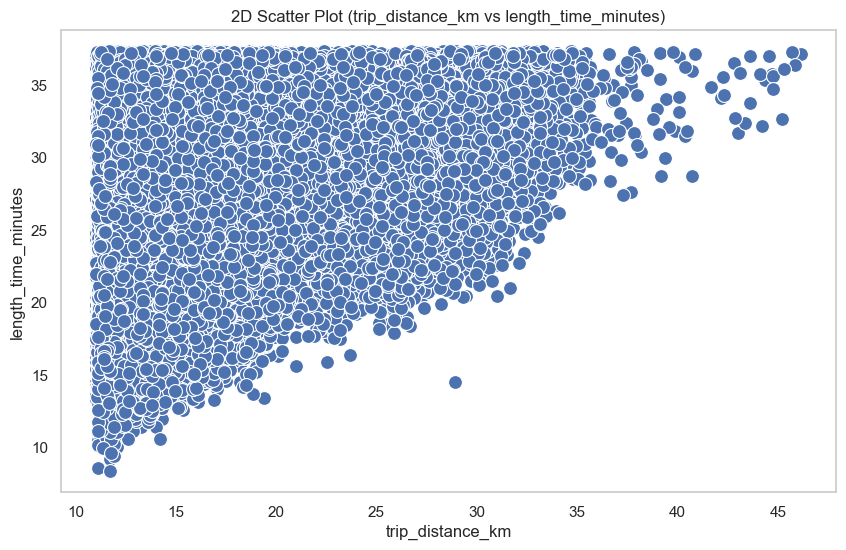

In [117]:
plot_scatter_with_color(taxi_df_outliers[taxi_df_outliers['average_velocity'] < 120], 'trip_distance_km' , 'length_time_minutes')

In [118]:
taxi_df_outliers = taxi_df_outliers[taxi_df_outliers['average_velocity'] > 120]

#### Case 2: Outliers with overly large time amounts but regular distances

In [119]:
taxi_df_outliers_1 = taxi_df_1[taxi_df_1['trip_distance_km'] <= upperbound_distance]
taxi_df_outliers_1 = taxi_df_outliers_1[taxi_df_outliers_1['length_time_minutes']  > upperbound_length_time_minutes]

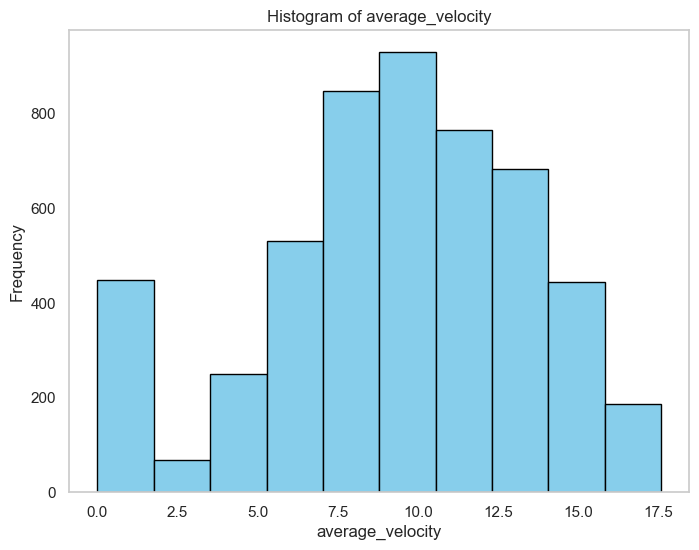

In [120]:
plot_histogram(taxi_df_outliers_1, 'average_velocity')

In [121]:
taxi_df_1['length_time_minutes'].describe()

count    491292.000000
mean         16.416681
std          44.914034
min           0.000000
25%           7.233333
50%          11.933333
75%          19.283333
max        1439.883333
Name: length_time_minutes, dtype: float64

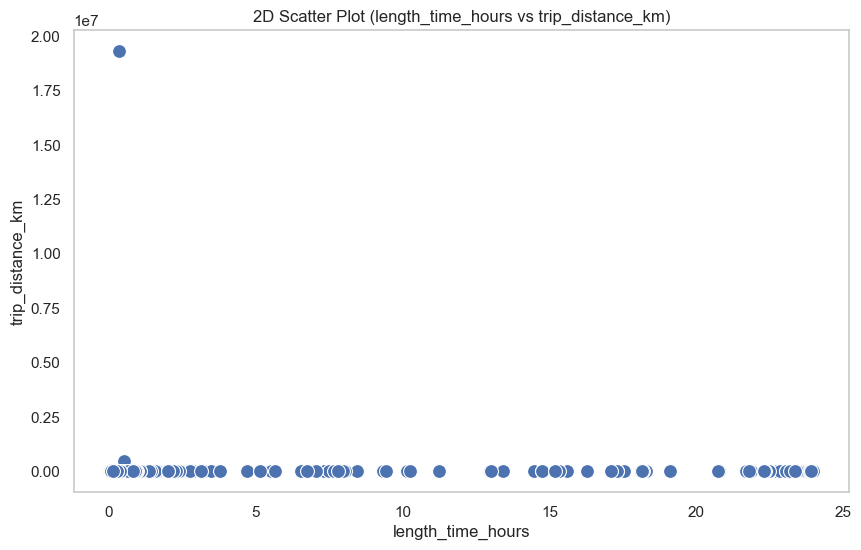

In [122]:
plot_scatter_with_color(taxi_df_1, 'length_time_hours', 'trip_distance_km')

In [123]:
taxi_df_outliers_1 = taxi_df_outliers_1[taxi_df_outliers_1['length_time_hours'] >= 4]

#### Case 3: Outliers with overly large time amounts and distances

In [124]:
taxi_df_outliers_2 = taxi_df_1[taxi_df_1['trip_distance_km'] > upperbound_distance]
taxi_df_outliers_2 = taxi_df_outliers_2[taxi_df_outliers_2['length_time_minutes'] > upperbound_length_time_minutes]

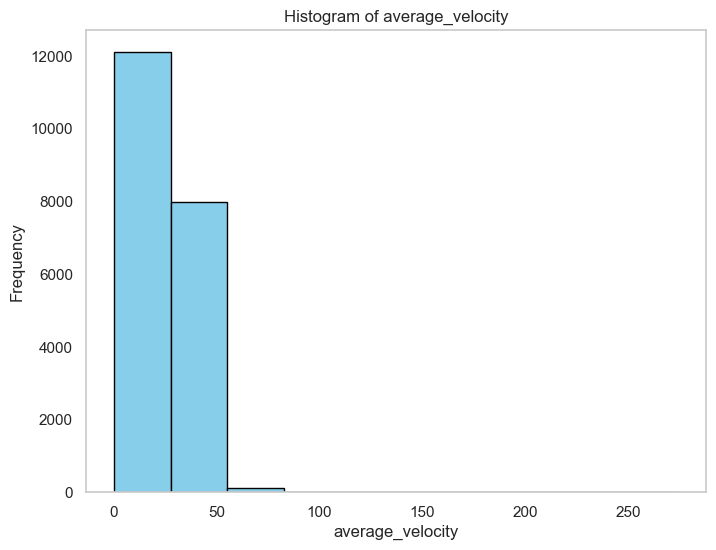

In [125]:
taxi_df_outliers_2 = taxi_df_outliers_2[np.isfinite(taxi_df_outliers_2['average_velocity'])]
plot_histogram(taxi_df_outliers_2, 'average_velocity')

In [126]:
taxi_df_outliers_2['trip_distance_km'].describe()

count    20203.000000
mean        22.907119
std          7.633704
min         11.040072
25%         16.511828
50%         21.838744
75%         28.807186
max        303.843392
Name: trip_distance_km, dtype: float64

In [127]:
taxi_df_outliers_2['length_time_minutes'].describe()

count    20203.000000
mean        57.036155
std         83.182561
min         37.366667
25%         41.833333
50%         47.733333
75%         57.775000
max       1439.483333
Name: length_time_minutes, dtype: float64

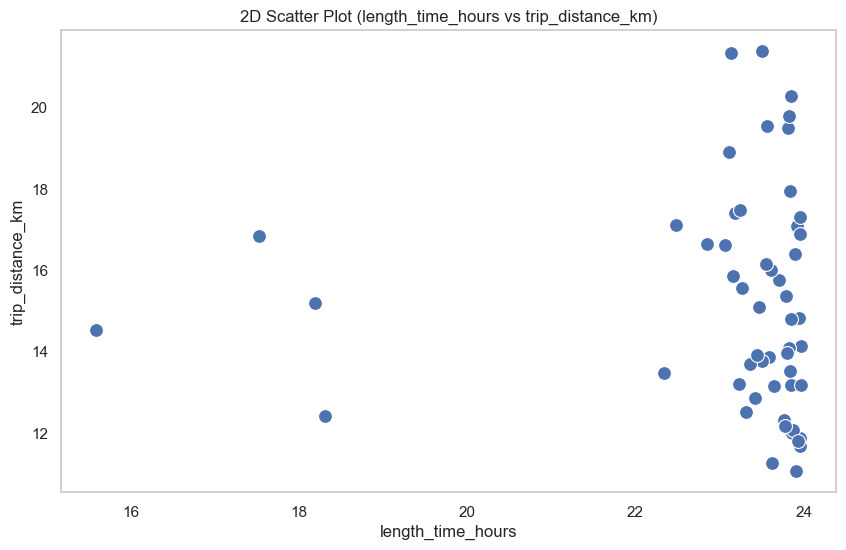

In [128]:
taxi_df_outliers_2 = taxi_df_outliers_2[(taxi_df_outliers_2['average_velocity'] > 100) | (taxi_df_outliers_2['length_time_hours'] > 5)]
plot_scatter_with_color(taxi_df_outliers_2[taxi_df_outliers_2['average_velocity'] < 1], 'length_time_hours', 'trip_distance_km')

#### Case 4 : Identifying 0 cases

In [129]:
zero_time_df = taxi_df_1[taxi_df_1['length_time_minutes'] == 0]
zero_dist_df = taxi_df_1[taxi_df_1['trip_distance_km'] == 0]
zero_dist_df.shape 

(823, 22)

###Correlations between continuous variables before and after temporarily removing outliers 
We now study the correlations between the variables continuous variables dealt with in the previous section. We will analyse both cases, the original dataframe containing outliers and the cleaned versions we have created.

In the first heatmap, correlations are almost zero, due to the presence of outliers. However, when these are excluded, it is possible to observe very strong correlations between all continuous features.

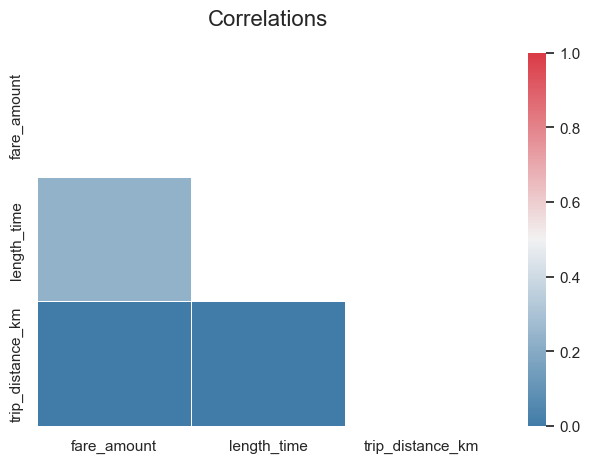

In [130]:
plot_correlation_heatmap(taxi_df_1, ['fare_amount', 'length_time', 'trip_distance_km'])

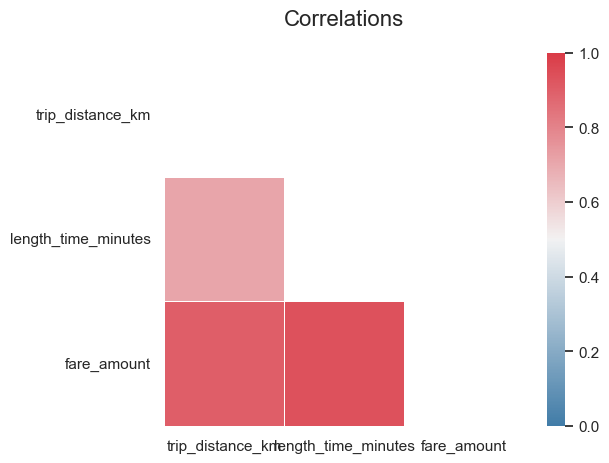

In [131]:
taxi_df_4 = taxi_df_1[
    (taxi_df_1['trip_distance_km'] <= upperbound_distance) & 
    (taxi_df_1['length_time_minutes'] <= upperbound_length_time_minutes) &
    (taxi_df_1['fare_amount'] <= upper_bound_fare_amount)]
plot_correlation_heatmap(taxi_df_4, columns = ["trip_distance_km", "length_time_minutes", "fare_amount"])

In [132]:
taxi_df_1 = taxi_df_1.drop(['trip_distance_km', 'length_time_minutes', 'length_time_hours', 'average_velocity'], axis = 1)

### Verifying the validy of the drop off and pickup locations 
The fastest and easiest way to see if there are outliers or problem with the pickup and dropoff locations is to plot them on a map and see wheather there are points too far away from New York, or other suspicious locations. The code that follows may take a while to run and produces an interactive HTML file that can be found in this folder.

The plots indicate no presence of anamalous location recordings. 

In [ ]:
#create_html_interactive_map(tidy_df,'pickup_latitude','pickup_longitude','pickup_locations')

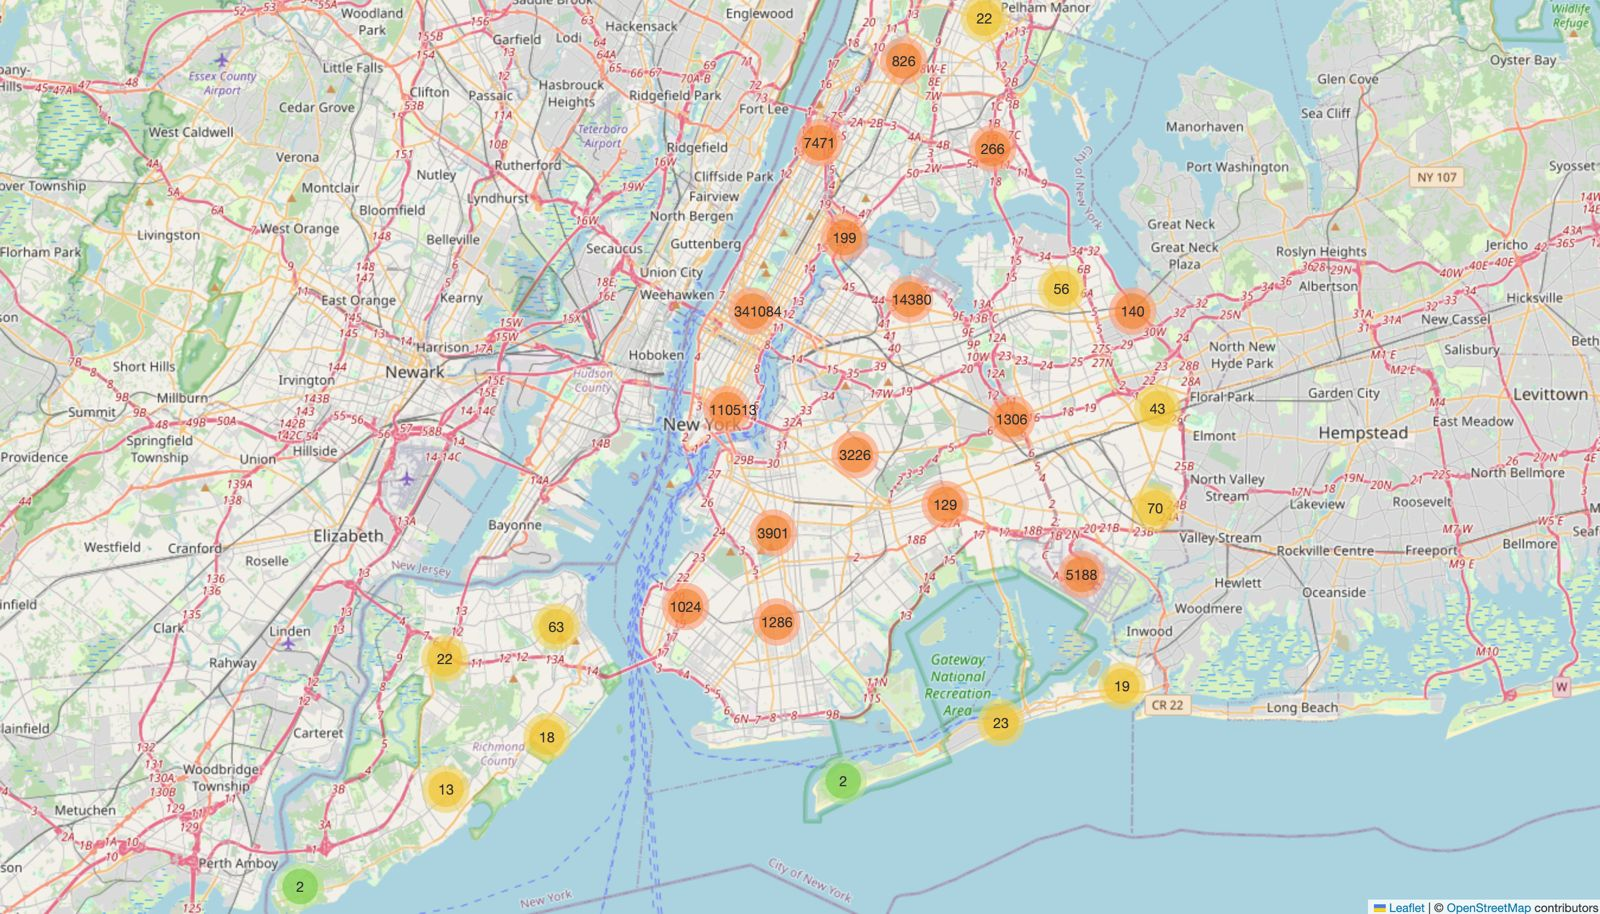

In [ ]:
Image(filename='pickup_locations.jpeg', width=1920, height=1080)

In [ ]:
# create_html_interactive_map(tidy_df,'dropoff_latitude','dropoff_longitude','dropoff_locations')

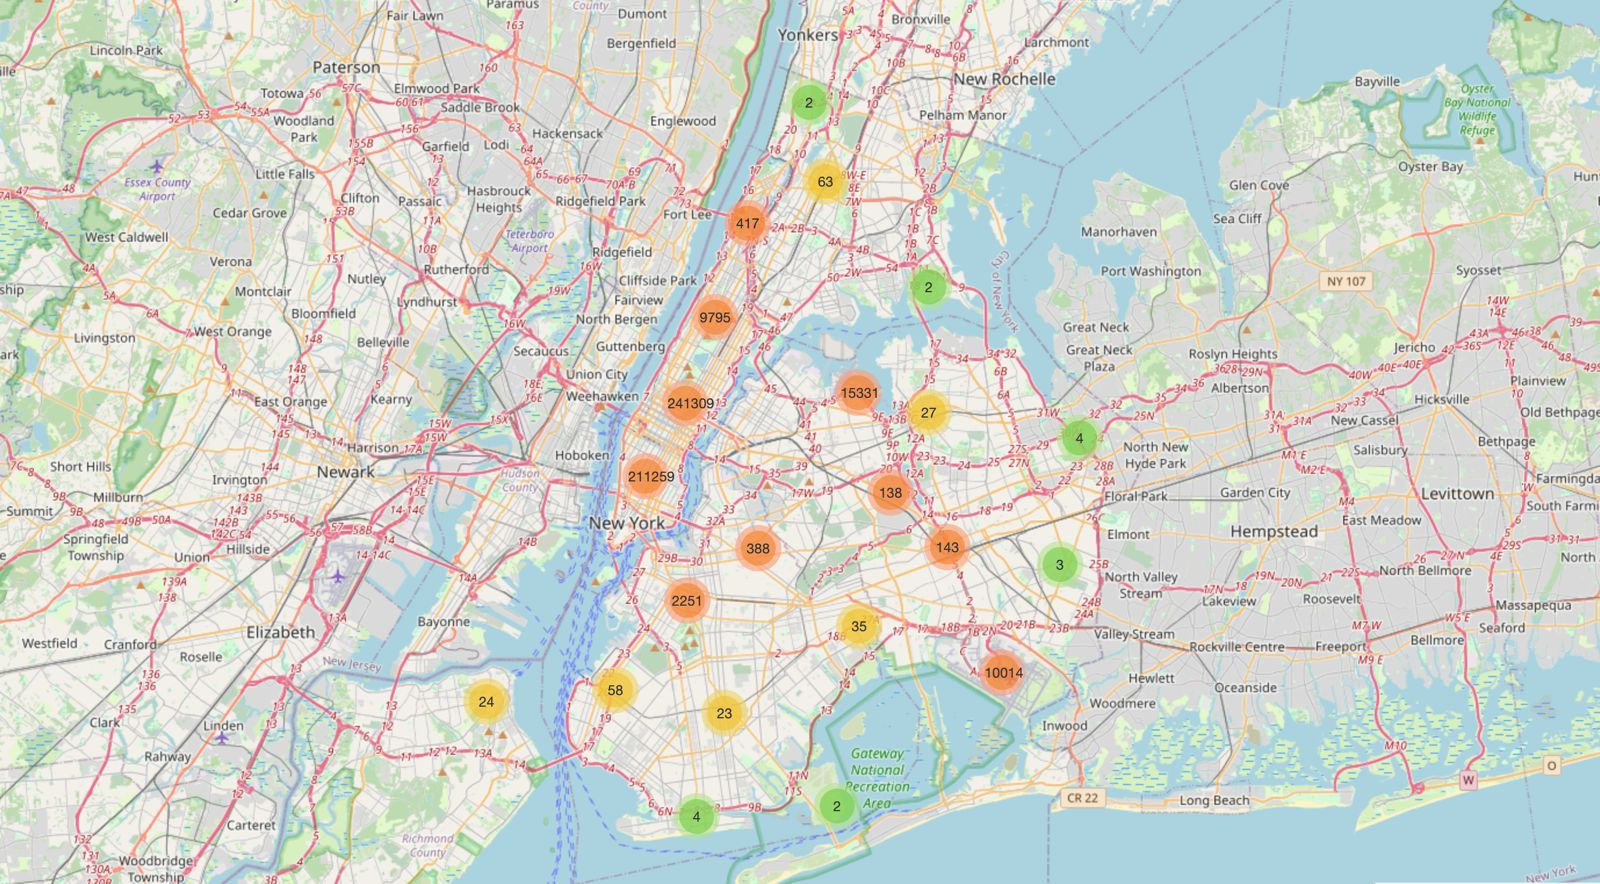

In [ ]:
Image(filename='drop_off_locations.jpeg', width=1920, height=1080)

## Fixing the dataframe 

Let's now develop the final form of the dataset, with the goal of making it clean, compact and tidy.
1. We express pickup temporal coordnates in a neat matter, agglomerating the useful information and deleting redundant columnns
2. Delete the BoroCode from the dataset (BoroCode refers only to the neighborhood) and also the 
3. Delete pickup_NTA and dropoff_NTA (which are already represented in the pair column)
4. Change the units of certain features and convert to DateTime type 

In [133]:
tidy_df = taxi_df_1.copy()

In [134]:
def is_leap_year(year):
    return calendar.isleap(year)
    
def day_of_year_to_day_of_month(year, day_of_year):
    if is_leap_year(year):
        days_in_month = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    else:
        days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

    for month in range(12):
        if sum(days_in_month[:month+1]) >= day_of_year:
            return day_of_year - sum(days_in_month[:month])

In [135]:
# create column with pick up day of the month
tidy_df['pickup_dom'] = tidy_df.apply(lambda row: day_of_year_to_day_of_month(2015, row['pickup_doy']), axis=1)
# create column with pick up day of the month
tidy_df['pickup_year'] = 2015
# create the datetime of pick up column
tidy_df['pickup_datetime'] = pd.to_datetime({
    'year': tidy_df['pickup_year'],
    'month': tidy_df['pickup_month'],
    'day': tidy_df['pickup_dom'],
    'hour': tidy_df['pickup_hour']
})

In [136]:
# select columns to drop
columns_to_drop = ['pickup_hour','pickup_month','pickup_week','pickup_doy','pickup_dom','pickup_year']

# drop the columns
tidy_df = tidy_df.drop(columns=columns_to_drop)

In [137]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
tidy_df['pickup_wday'] = tidy_df['pickup_wday'].astype(int) - 1
tidy_df['pickup_wday'] = tidy_df['pickup_wday'].apply(lambda x: days[x])


In [138]:
def create_html_interactive_map(df,col_lat,col_long,output_name):
    # Create a map centered around the mean of lat and lon values
    m = folium.Map(location=[df[col_lat].mean(), df[col_long].mean()], zoom_start=10)
    
    # Create a MarkerCluster object
    marker_cluster = MarkerCluster().add_to(m)
    
    # Add markers to the map
    for idx, row in df.iterrows():
        folium.Marker(location=[row[col_lat], row[col_long]], popup=f'Location {idx+1}').add_to(marker_cluster)
    # Save the map to an HTML file
    m.save(output_name+'.html')

In [143]:
tidy_df['pickup_NTACode'].unique()

array(['MN15', 'MN24', 'MN21', 'MN17', 'MN25', 'MN99', 'MN20', 'MN31',
       'MN23', 'MN50', 'MN40', 'MN13', 'MN34', 'MN19', 'MN14', 'MN27',
       'QN98', 'QN61', 'MN12', 'MN22', 'BK33', 'MN32', 'MN36', 'BK09',
       'MN09', 'MN28', 'QN72', 'BK64', 'BK73', 'BK68', 'QN31', 'MN04',
       'BX63', 'BK76', 'MN33', 'BK90', 'MN11', 'BK78', 'BK38', 'BK81',
       'BK77', 'QN20', 'BK75', 'BK37', 'QN76', 'BK32', 'MN03', 'BX14',
       'QN68', 'QN70', 'QN17', 'QN28', 'BK69', 'QN27', 'BK60', 'SI35',
       'MN01', 'MN06', 'BK79', 'BK63', 'BK61', 'QN71', 'SI22', 'QN01',
       'BK42', 'QN29', 'BX49', 'BK82', 'QN63', 'BX39', 'QN51', 'BK99',
       'MN35', 'BK41', 'BK72', 'QN99', 'QN52', 'QN30', 'QN55', 'SI37',
       'QN18', 'QN35', 'BK35', 'BK93', 'BK50', 'QN50', 'BX10', 'BK30',
       'BK58', 'QN60', 'QN37', 'BX05', 'BK31', 'BK83', 'QN54', 'QN22',
       'QN48', 'BK46', 'QN19', 'QN03', 'BK40', 'BK27', 'BK88', 'QN49',
       'BX26', 'QN02', 'QN21', 'BX17', 'BK34', 'BX29', 'BX36', 'BK95',
      

In [144]:
tidy_df[tidy_df['pickup_BoroCode'] == 1]['pickup_NTACode'].unique()

array(['MN15', 'MN24', 'MN21', 'MN17', 'MN25', 'MN99', 'MN20', 'MN31',
       'MN23', 'MN50', 'MN40', 'MN13', 'MN34', 'MN19', 'MN14', 'MN27',
       'MN12', 'MN22', 'MN32', 'MN36', 'MN09', 'MN28', 'MN04', 'MN33',
       'MN11', 'MN03', 'MN01', 'MN06', 'MN35'], dtype=object)

In [145]:
tidy_df[tidy_df['pickup_BoroCode'] == 2]['pickup_NTACode'].unique()

array(['BX63', 'BX14', 'BX49', 'BX39', 'BX10', 'BX05', 'BX26', 'BX17',
       'BX29', 'BX36', 'BX06', 'BX13', 'BX22', 'BX35', 'BX09', 'BX43',
       'BX52', 'BX30', 'BX75', 'BX41', 'BX28', 'BX46', 'BX40', 'BX34',
       'BX03', 'BX08', 'BX59', 'BX62', 'BX01', 'BX37'], dtype=object)

In [146]:
tidy_df[tidy_df['pickup_BoroCode'] == 3]['pickup_NTACode'].unique()

array(['BK33', 'BK09', 'BK64', 'BK73', 'BK68', 'BK76', 'BK90', 'BK78',
       'BK38', 'BK81', 'BK77', 'BK75', 'BK37', 'BK32', 'BK69', 'BK60',
       'BK79', 'BK63', 'BK61', 'BK42', 'BK82', 'BK99', 'BK41', 'BK72',
       'BK35', 'BK93', 'BK50', 'BK30', 'BK58', 'BK31', 'BK83', 'BK46',
       'BK40', 'BK27', 'BK88', 'BK34', 'BK95', 'BK21', 'BK43', 'BK96',
       'BK19', 'BK29', 'BK91', 'BK44', 'BK85', 'BK28', 'BK17', 'BK45'],
      dtype=object)

In [147]:
tidy_df[tidy_df['pickup_BoroCode'] == 4]['pickup_NTACode'].unique()

array(['QN98', 'QN61', 'QN72', 'QN31', 'QN20', 'QN76', 'QN68', 'QN70',
       'QN17', 'QN28', 'QN27', 'QN71', 'QN01', 'QN29', 'QN63', 'QN51',
       'QN99', 'QN52', 'QN30', 'QN55', 'QN18', 'QN35', 'QN50', 'QN60',
       'QN37', 'QN54', 'QN22', 'QN48', 'QN19', 'QN03', 'QN49', 'QN02',
       'QN21', 'QN53', 'QN47', 'QN25', 'QN45', 'QN06', 'QN38', 'QN08',
       'QN34', 'QN26', 'QN57', 'QN56', 'QN10', 'QN07', 'QN42'],
      dtype=object)

In [148]:
tidy_df[tidy_df['pickup_BoroCode'] == 5]['pickup_NTACode'].unique()

array(['SI35', 'SI22', 'SI37', 'SI24'], dtype=object)

In [149]:
tidy_df = tidy_df.drop(['pickup_BoroCode', 'pickup_NTACode','dropoff_BoroCode', 'dropoff_NTACode'], axis = 1)

In [150]:
hours = tidy_df['length_time']//3600
minutes = tidy_df['length_time']%60
tidy_df['length_time (hours)'] = hours.astype('str') + ':' + minutes.astype('str')
tidy_df = tidy_df.drop(['length_time'], axis = 1)

## Final dataset format
Note that we have not removed any outliers. We simply present a way of organising the dataframe.

In [151]:
tidy_df.head(10)

,pickup_wday,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,fare_amount,pair,pickup_datetime,length_time (hours)
0,Thu,-73.983009,40.766602,-73.967972,40.760677,1,1,7.0,MN15-MN19,2015-05-12 18:00:00,0:40
1,Thu,-74.009789,40.712395,-73.983223,40.760330,1,1,12.5,MN24-MN17,2015-05-26 07:00:00,0:12
2,Sat,-73.989510,40.734470,-73.997185,40.717976,1,1,10.0,MN21-MN24,2015-05-07 18:00:00,0:44
3,Sat,-73.978989,40.755726,-73.951187,40.789021,1,1,12.0,MN17-MN33,2015-05-28 02:00:00,0:37
4,Sat,-73.985313,40.761181,-73.865250,40.770699,2,1,37.5,MN17-QN98,2015-05-21 17:00:00,0:31
5,Thu,-74.012741,40.702229,-73.998878,40.713711,2,1,11.5,MN25-MN27,2015-05-12 07:00:00,0:56
6,Sat,-73.970909,40.767231,-73.979507,40.752331,2,1,7.5,MN99-MN20,2015-05-14 11:00:00,0:10
7,Sat,-73.980827,40.738148,-73.984062,40.747284,1,1,6.5,MN21-MN17,2015-05-28 22:00:00,0:6
8,Sun,-73.973869,40.747925,-73.986618,40.730328,1,1,7.5,MN20-MN22,2015-05-08 20:00:00,0:21
9,Tue,-73.994209,40.751015,-73.959312,40.772594,1,1,17.0,MN17-MN40,2015-05-10 15:00:00,0:36
